<h1> Importing The Necessary Modules </h1>

In [2]:
import tweepy as twt
from textblob import TextBlob
# from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
logDets = pd.read_csv('Login.csv')
# print(logDets)

In [4]:
# The Twitter API credentials
consumerKey = logDets['key'][0]
consumerSecret = logDets['key'][1]
accessToken = logDets['key'][2]
accessTokenSecret = logDets['key'][3]


In [5]:
# Auth Object
authenticate = twt.OAuthHandler(consumerKey, consumerSecret)

# Set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create API object
api = twt.API(authenticate, wait_on_rate_limit=True)

In [6]:
# Extract 100 tweets from Twitter user
posts = api.user_timeline(id = '@owusu2kelvin', count=20, lang = 'en', tweet_mode = 'extended')

# Show tweets
print("Show tweets" + '\n')
n = 1
for tweet in posts[0:5]:
    print(str(n) + ') '+tweet.full_text + "\n")
    n=n+1

Unexpected parameter: id
Unexpected parameter: lang


Show tweets

1) RT @GrizzOnBally: ARE YOU KIDDING ME JA MORANT?! 🤯

@JaMorant | #NBAAllStar https://t.co/naMJocd3Pj

2) RT @bluewirepods: The Splash Bros are back 😈 https://t.co/NlLvUAqxoE

3) RT @EmiratesFACup: 𝗕𝗔𝗖𝗞-𝗛𝗘𝗘𝗟 𝗚𝗢𝗔𝗟 🔥

Just Firmino things @LFC 🇧🇷

#EmiratesFACup https://t.co/f6u45MpUWd

4) RT @SportsCenter: The rest of the league when Klay's returning to the 29-9 Warriors: https://t.co/6u9WOikNLs

5) RT @KingJosiah54: Klay coming back to the Warriors https://t.co/RhWbNUWCXo



In [7]:
# Create dataframe with column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,RT @GrizzOnBally: ARE YOU KIDDING ME JA MORANT...
1,RT @bluewirepods: The Splash Bros are back 😈 h...
2,RT @EmiratesFACup: 𝗕𝗔𝗖𝗞-𝗛𝗘𝗘𝗟 𝗚𝗢𝗔𝗟 🔥\n\nJust Fi...
3,RT @SportsCenter: The rest of the league when ...
4,RT @KingJosiah54: Klay coming back to the Warr...


In [8]:
# Cleaning the text using a function
def cleanTxt(text):
    text =re.sub(r'@[A-Za-z0-9_]+', '', text) # Removing @mentions
    text = re.sub(r'#', '', text) # Removing Hashtags
    text = re.sub(r'RT[\s]+:', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Removing hyperlinks

    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt) # Cleaning the texts

df.head() # Showing the cleaned texts

,Tweets
0,ARE YOU KIDDING ME JA MORANT?! 🤯\n\n | NBAAll...
1,The Splash Bros are back 😈
2,𝗕𝗔𝗖𝗞-𝗛𝗘𝗘𝗟 𝗚𝗢𝗔𝗟 🔥\n\nJust Firmino things 🇧🇷\n...
3,The rest of the league when Klay's returning ...
4,Klay coming back to the Warriors


In [9]:
# A function to get the subjectivity
def getSubject(text):
    return TextBlob(text).sentiment.subjectivity

# A funtion to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Adding two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubject)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [10]:
df

,Tweets,Subjectivity,Polarity
0,ARE YOU KIDDING ME JA MORANT?! 🤯\n\n | NBAAll...,0.00,0.00
1,The Splash Bros are back 😈,0.00,0.00
2,𝗕𝗔𝗖𝗞-𝗛𝗘𝗘𝗟 𝗚𝗢𝗔𝗟 🔥\n\nJust Firmino things 🇧🇷\n...,0.00,0.00
3,The rest of the league when Klay's returning ...,0.00,0.00
4,Klay coming back to the Warriors,0.00,0.00
5,“I’m back.” - \n\nKlay941,0.00,0.00
6,HIGH SCHOOLER Brandon Miller must’ve been stu...,0.54,0.16
7,Storyline is a bit cliché but the fight scene...,0.00,0.00
8,Moi!!!!,0.00,0.00
9,Who else can relate?🤦🏾‍♂️🤣😀\n\nPulseViral,0.00,0.00


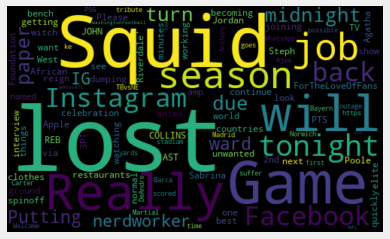

In [10]:
# Plotting a WordCloud for visualizing most used words
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# Create function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

my_d = list(df['Tweets'])
my_d
# print(type(my_d))
cleaned_df = []
for twt in my_d:
    cleaned_df.append(twt.replace("\n", ""))
cleaned_df
# df.head(20)

[' When the paper due at midnight and you turn it in at 11:59:59 ',
 ' Putting the Squid(ward) in ‘Squid Game’ 🦑(🎨 nerdworker on IG | ForTheLoveOfFans) ',
 ' Please do an anime one next. Really want to see how it will look like 🙏🙏',
 " Steph's bench celebration is elite ",
 " The world's 50 best restaurants for 2021 have been named  ",
 ' The West African countries becoming the dumping ground for unwanted clothes ',
 " Sabrina joining 'Riverdale' and Agatha getting her spinoff show —\xa0It really is the season of the witch 🧹 ",
 " 'Foundation's reign will continue for a 2nd season on Apple TV+ ",
 ' JOHN COLLINS DID WHAT 😱 ',
 ' ',
 ' Me in a job                     Me when I  interview                       get the job ',
 ' The  have been watching Squid Game too.😂 🚦 (via ) ',
 ' Jordan Poole in 22 minutes tonight:30 PTS5 REB5 AST7 3PT ',
 ' When Instagram &amp; Facebook are down. ',
 ' "We are working to get things back to normal as quickly as possible"Facebook, WhatsApp and Instagra

In [12]:
# Count of Negative, Neutral and Positive analysis
df['Analysis'].value_counts()

Neutral     9
Positive    7
Negative    4
Name: Analysis, dtype: int64

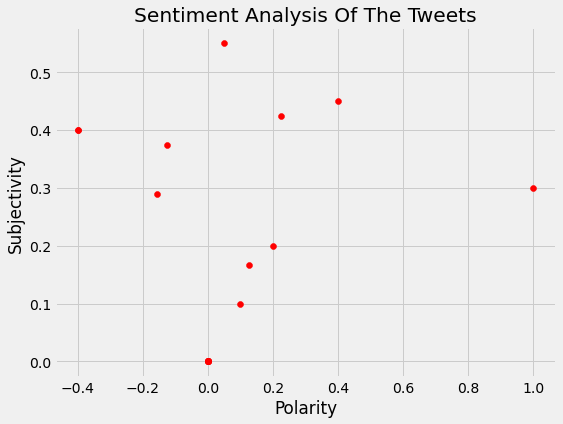

In [13]:
# Plotting the ploarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(len(df)):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')
    
plt.title('Sentiment Analysis Of The Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()